# Overview

This notebook deals with the analysis of the data. The following questions were investigated:

- [Which job titles are searched the most often?](#job_titles)
- [Which programming languages are most commonly used?](#languages)
- [Which tools are used most frequently?](#tools)
- [Which databases are most commonly used?](#databases)
- [Which Python libraries are most commonly used?](#libraries)
- [How much Machine Learning knowledge is required?](#machine_learning)
- [What soft skills are most often required?](#soft_skills)
- [What degrees are required?](#degrees)
- [How much work experience is required?](#experience)
- [Does the size of a company have an impact on the positions being sought?](#company_size)
- [Which attributes increase the home office probability?](#home_office)
- [In which regions of Germany are most Data Science jobs offered?](#regions)
- [Which companies search the most for new data roles?](#company)
- [Which attributes influence the salary of a job?](#salary)

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# set styling parameters for matplotlib and seaborn
plt.rcParams.update({
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})
sns.set_style("darkgrid")

warnings.filterwarnings('ignore')


In [2]:
df_wide = pd.read_csv("../data/data_wide.csv")
df_wide = df_wide.loc[df_wide["title_category"] != "Others"]
df_wide.head()

,link,company,title,content,rating,num_ratings,company_link,release_date,company_size,permanent_employment,...,creativity,leadership,flexibility,business_focus,initiative,structured_working,<=2_years_experience,3-4_years_experience,>=5_years_experience,no_experience_information
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,True,...,False,False,False,False,False,False,False,False,False,True
1,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,Direkter geht Karriere nicht.Einstieg bei der ...,4.3,16 Bewertungen,NaN,2022-06-03,NaN,True,...,False,False,False,False,False,False,False,False,False,True
2,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,Direkter geht Karriere nicht.Einstieg bei der ...,4.3,16 Bewertungen,NaN,2022-06-03,NaN,True,...,False,False,False,False,False,False,False,False,False,True
3,https://www.stepstone.de/stellenangebote--Data...,METRO Markets GmbH,Data Science Lead,We create the future of B2B commerce by giving...,NaN,NaN,NaN,2022-06-01,NaN,True,...,False,False,True,False,False,False,False,False,True,False
4,https://www.stepstone.de/stellenangebote--Busi...,R+V Allgemeine Versicherung AG,Business Analyst / Data Science (m/w/d),Wie sich die Versicherung von morgen anfühlen ...,4.4,247 Bewertungen,https://www.stepstone.de/cmp/de/R-V-Allgemeine...,2022-06-01,"10,001+",True,...,False,False,False,False,True,False,False,False,False,True


In [3]:
df_wide.columns

Index(['link', 'company', 'title', 'content', 'rating', 'num_ratings',
       'company_link', 'release_date', 'company_size', 'permanent_employment',
       ...
       'creativity', 'leadership', 'flexibility', 'business_focus',
       'initiative', 'structured_working', '<=2_years_experience',
       '3-4_years_experience', '>=5_years_experience',
       'no_experience_information'],
      dtype='object', length=145)

The data contains a number of different attributes. However, for many of the following analyses, only a subset of the attributes is needed. Therefore, an additional column index is introduced at this point, which divides the attributes into different groups and allows for easier filtering.

In [4]:
groups = 21*["general_info"] + 18*["languages"] + 31*["tools"] + 21*["databases"] + 18*["libraries"] + 4*["degree"] + 5*["major"] + 13*["knowledge"] + 10*["soft_skills"] + 4*["experience"]
df_wide.columns = pd.MultiIndex.from_arrays([groups, df_wide.columns])
df_wide.head(1)

general_info                     \
                                                link            company   
0  https://www.stepstone.de/stellenangebote--Anal...  BearingPoint GmbH   

                                                      \
                                               title   
0  Analyst Data Science & Artificial Intelligence...   

                                                                              \
                                             content rating      num_ratings   
0  Design your own career.Make your point @ Beari...    3.9  312 Bewertungen   

                                                                   \
                                        company_link release_date   
0  https://www.stepstone.de/cmp/de/BearingPoint-G...   2022-06-03   

                                     ... soft_skills                         \
  company_size permanent_employment  ...  creativity leadership flexibility   
0    2501-5000                 True  ...       False      False       False   

                                                         experience  \
  business_focus initiative structured_working <=2_years_experience   
0          False      False              False                False   

                                                                       
  3-4_years_experience >=5_years_experience no_experience_information  
0                False                False                      True  

[1 rows x 145 columns]

<a id="job_titles"></a> 

## Which job titles are searched the most often?

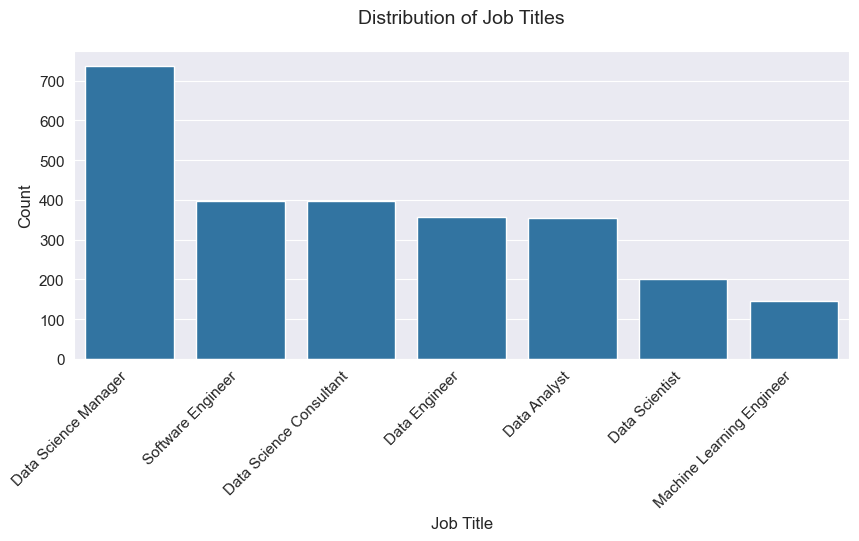

In [5]:
job_counts = df_wide["general_info", "title_category"].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title('Distribution of Job Titles', pad=20)
plt.ylabel('Count')
plt.xlabel('Job Title')
plt.xticks(rotation=45, ha='right');

Summary:

- manager positions are by far the most sought after
    - however, this is due to the fact that all non-manager positions have been further subdivided according to their exact area of responsibility
- job offers for Data Scientists and Machine Learning Engineers are significantly rarer than the other positions
    - however, the job titles are not always representative of the actual job (many Software Engineers in the field of Data Science probably perform the same tasks as a Machine Learning Engineer)

<a id="languages"></a>

## Which programming languages are most commonly used?

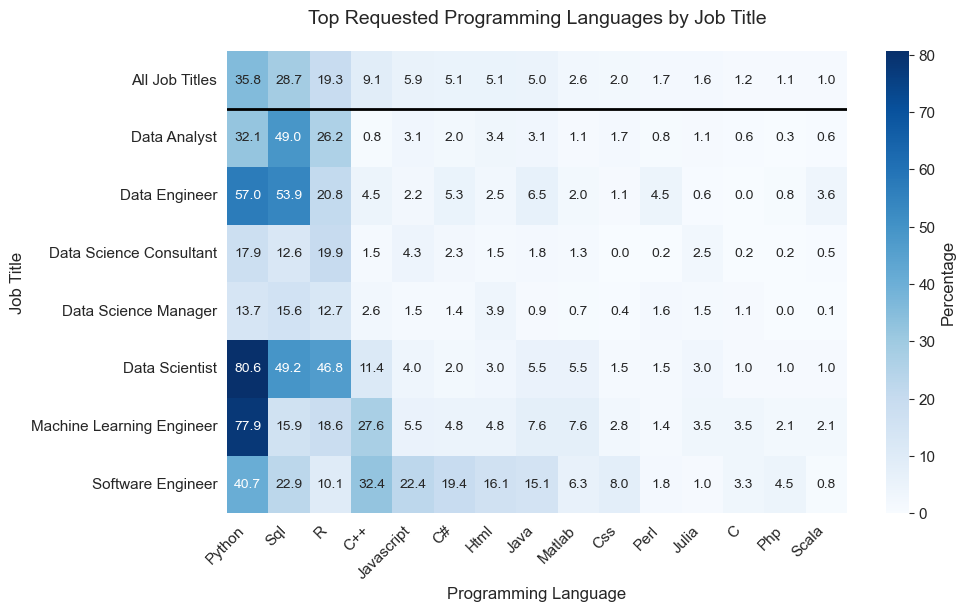

In [6]:
joint_dist = df_wide["languages"].groupby(df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["languages"].mean().apply(lambda x: round(x*100,2))
top_skills = marginal_dist.sort_values(ascending=False).head(15).index
plot_data = pd.DataFrame([marginal_dist[top_skills]], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist[top_skills]])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Top Requested Programming Languages by Job Title', pad=20)
plt.xlabel('Programming Language')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

Summary:

- programming languages used vary widely between job titles
- Python, R and Sql are most commonly used regardless of job title
    - in jobs with a greater focus on programming (e.g., Machine Learning Engineer), Python is preferred over R
    - in other positions (e.g., Data Analyst), the distribution is more balanced
- other programming languages are generally much less widespread
    - only as Machine Learning Engineer or Software Engineer (and to a lesser degree as Data Scientist or Data Engineer) other languages like C++ are expected in some cases

<a id="tools"></a>

## Which tools are most commonly used?

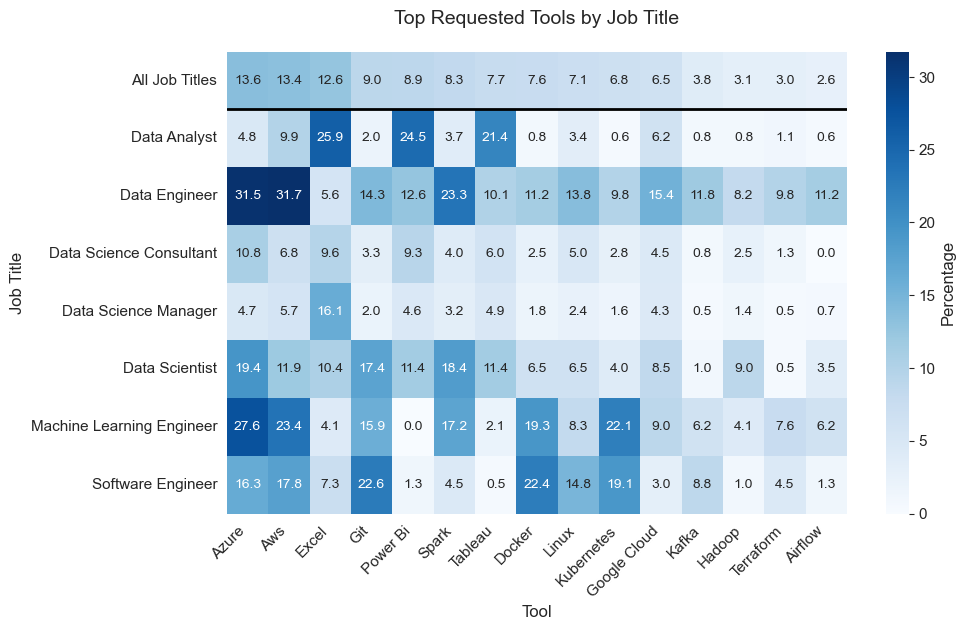

In [7]:
joint_dist = df_wide["tools"].groupby(df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["tools"].mean().apply(lambda x: round(x*100,2))
top_skills = marginal_dist.sort_values(ascending=False).head(15).index
plot_data = pd.DataFrame([marginal_dist[top_skills]], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist[top_skills]])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Top Requested Tools by Job Title', pad=20)
plt.xlabel('Tool')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

Summary:

- with regard to the tools used, three rough groups can be divided
- for a Data Engineer, Data Scientist, Machine Learning Engineer or Software Engineer, mastery of many different tools is required
    - a platform for cloud computing (e.g., Azure or AWS).
    - Git for version control and collaboration with other team members
    - frameworks for processing huge amounts of data (e.g., Spark)
    - frameworks for containerization (Docker and Kubernetes)
- for a Data Science Consultant or Data Science Manager, tools are rather secondary
- as a Data analyst, software for visualizing data (Tableau, Power BI or Excel) is needed most of all

<a id="databases"></a>

## Which databases are most commonly used?

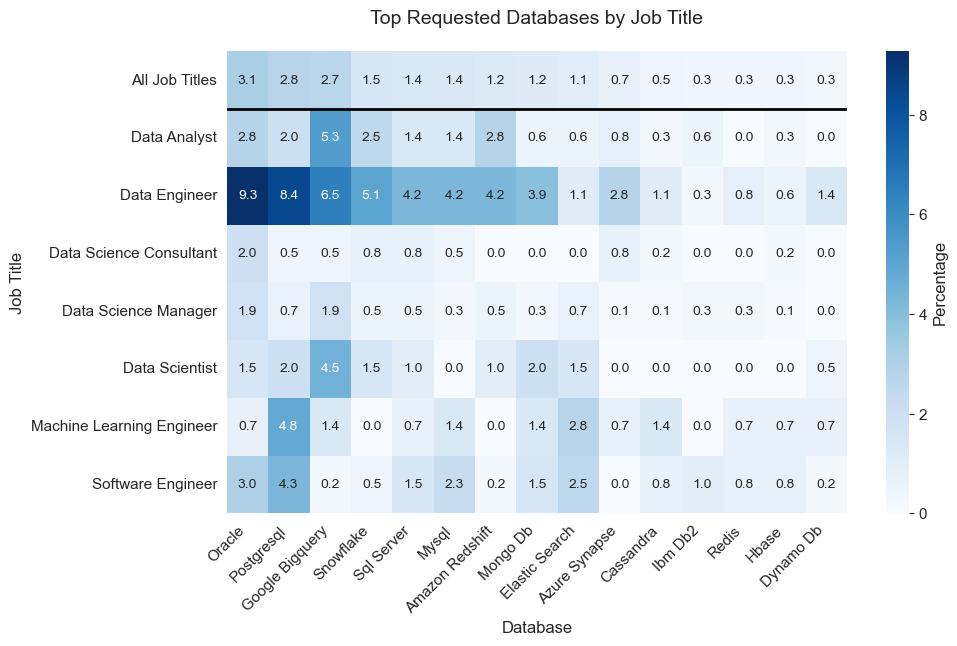

In [8]:
joint_dist = df_wide["databases"].groupby(df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["databases"].mean().apply(lambda x: round(x*100,2))
top_skills = marginal_dist.sort_values(ascending=False).head(15).index
plot_data = pd.DataFrame([marginal_dist[top_skills]], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist[top_skills]])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Top Requested Databases by Job Title', pad=20)
plt.xlabel('Database')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

Summary:

- Only a small proportion of job advertisements mention specific databases (mostly Data Engineers)
- Oracle, Postgresql and Google Bigquery are much more widespread than the other databases
    - otherwise the remaining differences are rather small

<a id="libraries"></a>

## Which Python libraries are most commonly used?

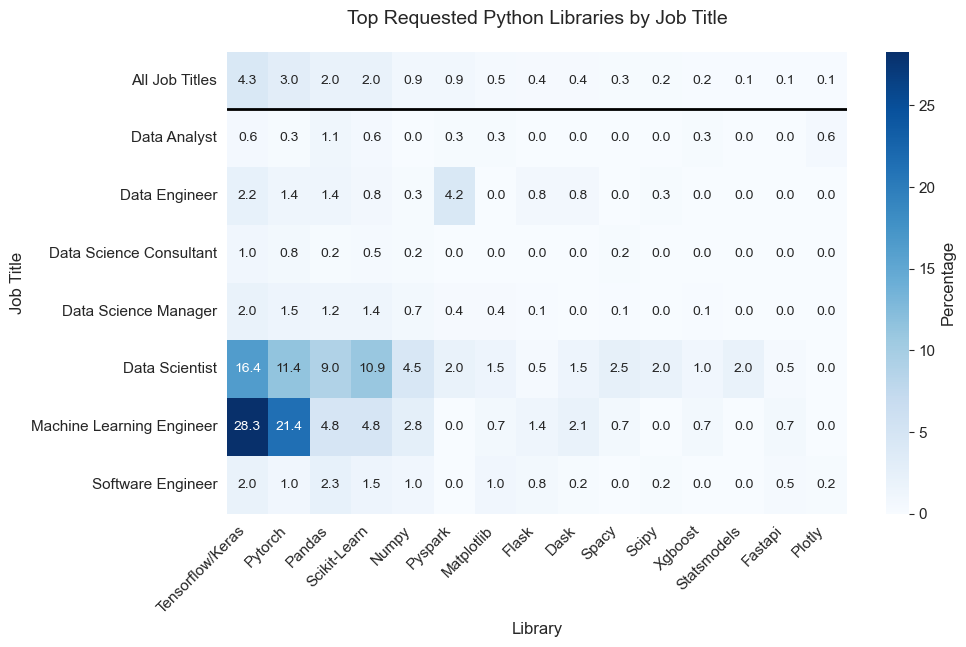

In [9]:
joint_dist = df_wide["libraries"].groupby(df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["libraries"].mean().apply(lambda x: round(x*100,2))
top_skills = marginal_dist.sort_values(ascending=False).head(15).index
plot_data = pd.DataFrame([marginal_dist[top_skills]], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist[top_skills]])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Top Requested Python Libraries by Job Title', pad=20)
plt.xlabel('Library')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

Summary:

- only a small percentage of job ads include specific Python libraries 
    - however, it may be that some ads already assume them under Python and therefore do not explicitly mention them again
- only for Data Scientists and Machine Learning Engineers certain libraries are regularly requested
    - Deep Learning libraries like Tensorflow/Keras and Pytorch (Tensorflow currently still has the upper hand here)
    - Pandas and Numpy for efficient data manipulation
    - Scikit-Learn for classic machine learning models
- for data engineers, the Pyspark library is often required for the parallel processing of data

<a id="machine_learning"></a>

## How much Machine Learning knowledge is required?

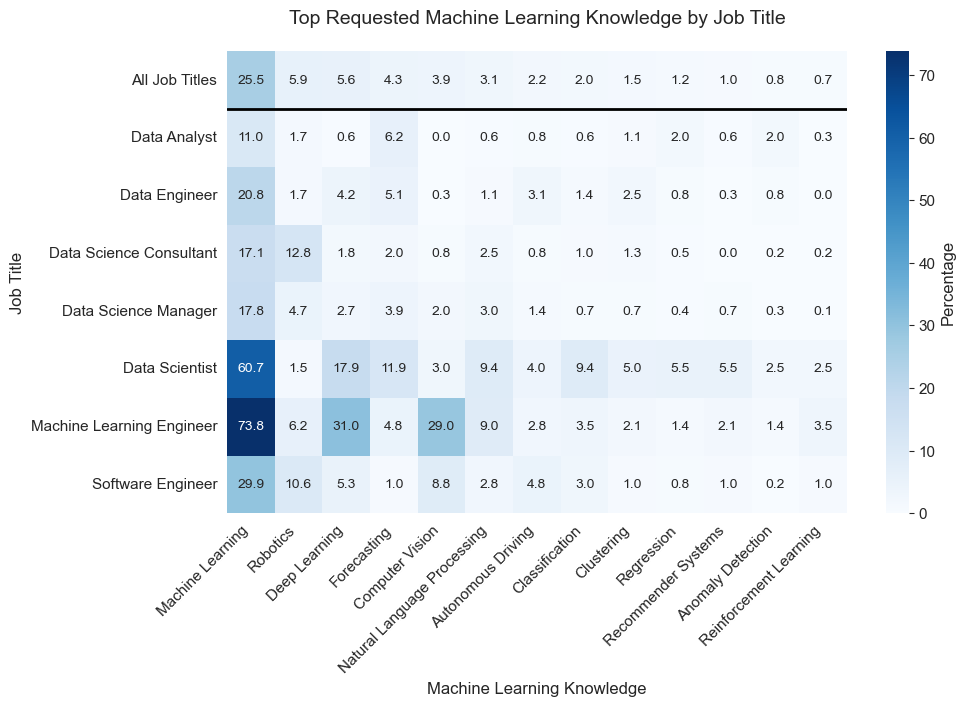

In [10]:
joint_dist = df_wide["knowledge"].groupby(df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["knowledge"].mean().apply(lambda x: round(x*100,2))
top_skills = marginal_dist.sort_values(ascending=False).head(15).index
plot_data = pd.DataFrame([marginal_dist[top_skills]], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist[top_skills]])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Top Requested Machine Learning Knowledge by Job Title', pad=20)
plt.xlabel('Machine Learning Knowledge')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

Summary:

- Machine Learning is only mentioned in a quarter of the job advertisements
    - for Data Scientists and Machine Learning Engineers, however, this topic is much more relevant than for other jobs
- only one fifth of these Machine Learning applications are Deep Learning applications
    - the majority of current applications seem to be more related to predictive modeling using classical algorithms
    - only Machine Learning Engineers have several job advertisements that apply deep learning especially in the field of Computer Vision

<a id="soft_skills"></a>

## What soft skills are most often required?

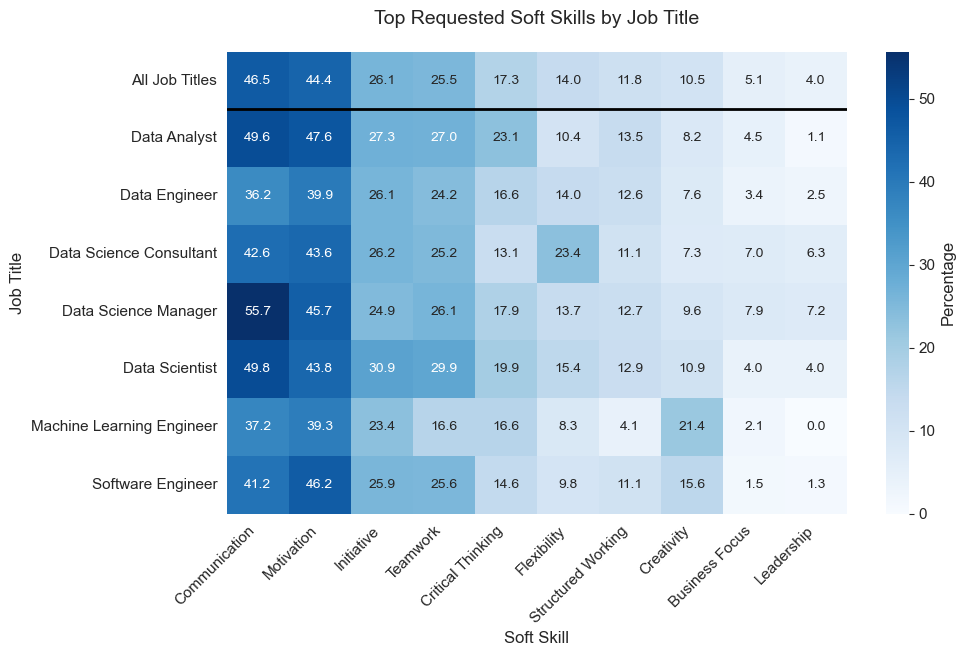

In [11]:
joint_dist = df_wide["soft_skills"].groupby(df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["soft_skills"].mean().apply(lambda x: round(x*100,2))
top_skills = marginal_dist.sort_values(ascending=False).head(15).index
plot_data = pd.DataFrame([marginal_dist[top_skills]], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist[top_skills]])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Top Requested Soft Skills by Job Title', pad=20)
plt.xlabel('Soft Skill')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

Summary:
- the most frequently required soft skills are communication and motivation, followed by initiative and teamwork
    - the distribution of soft skills is very similar for all positions
- smaller deviations exist, however
    - for Data Science Managers, communication, business focus and leadership are required comparatively more often than for other jobs
    - for a Consultant, flexibility (e.g. willingness to travel) is in the foreground
    - it is also noticeable that creativity is comparatively often required for Machine Learning Engineers and Software Engineers
- overall, it is difficult to identify clear differences in soft skills, as these are always desirable, regardless of the exact position.

<a id="degrees"></a>

## What degrees are required?

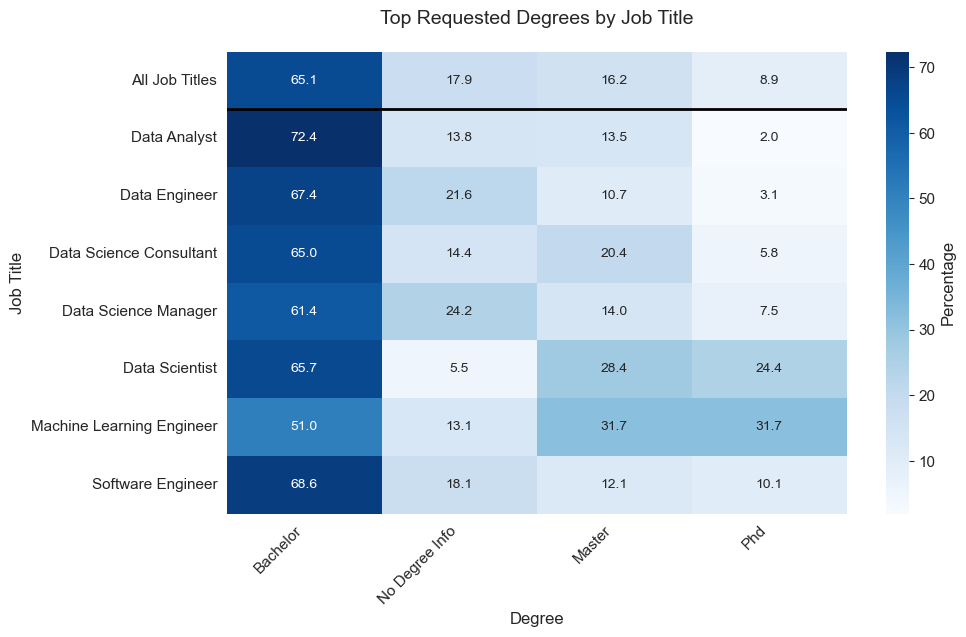

In [12]:
joint_dist = df_wide["degree"].groupby(df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["degree"].mean().apply(lambda x: round(x*100,2))
top_skills = marginal_dist.sort_values(ascending=False).head(15).index
plot_data = pd.DataFrame([marginal_dist[top_skills]], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist[top_skills]])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Top Requested Degrees by Job Title', pad=20)
plt.xlabel('Degree')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

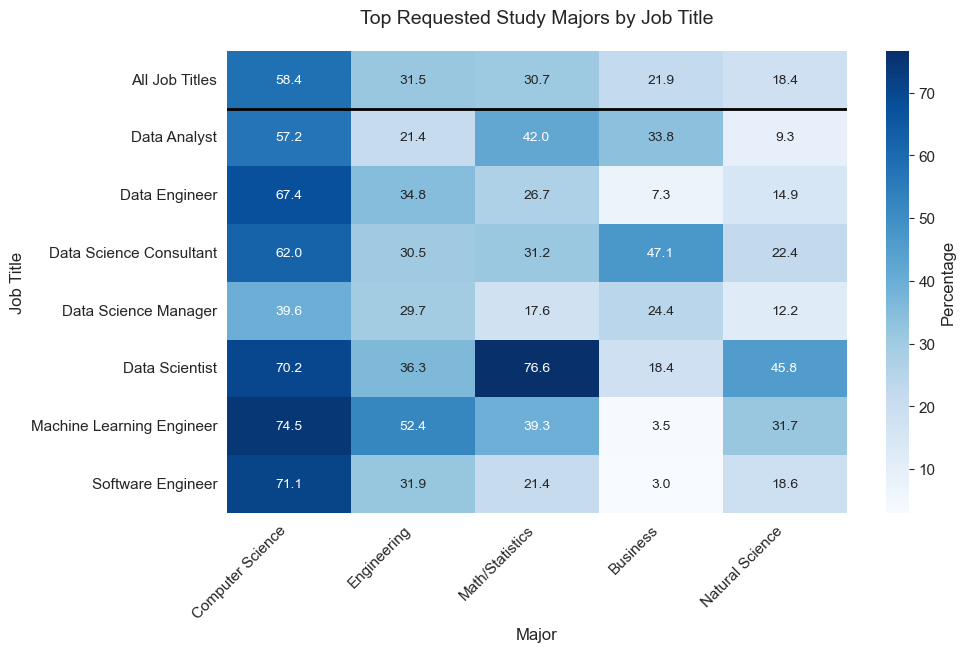

In [13]:
joint_dist = df_wide["major"].groupby(df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["major"].mean().apply(lambda x: round(x*100,2))
top_skills = marginal_dist.sort_values(ascending=False).head(15).index
plot_data = pd.DataFrame([marginal_dist[top_skills]], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist[top_skills]])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Top Requested Study Majors by Job Title', pad=20)
plt.xlabel('Major')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

Summary:

- a degree is required for a majority of the positions
    - the distribution of degrees is relatively similar between the job titles
    - it is noticeable that a Master's degree or Phd is explicitly required comparatively often for Data Scientist and Machine Learning Engineer
- a Computer Science degree is the best choice to get a Data Science job
    - of course, a Data Science degree would also be acceptable for most jobs
        - since the term "Data Science" occurs several times in most job descriptions anyway, it would be difficult to extract only those occurrences that refer to a degree program
- for the job of a Data Scientist, a comparatively high value is placed on mathematics/statistics skills
- a business degree is particularly suitable for employment as a Consultant, Manager or Analyst

 <a id="experience"></a>

## How much work experience is required?

Because of the relatively small sample sizes for exact years, work experience was divided into three categories during preprocessing:
- little experience: 0-2 years
- some experience: 3-4 years
- much experience: 5+ years

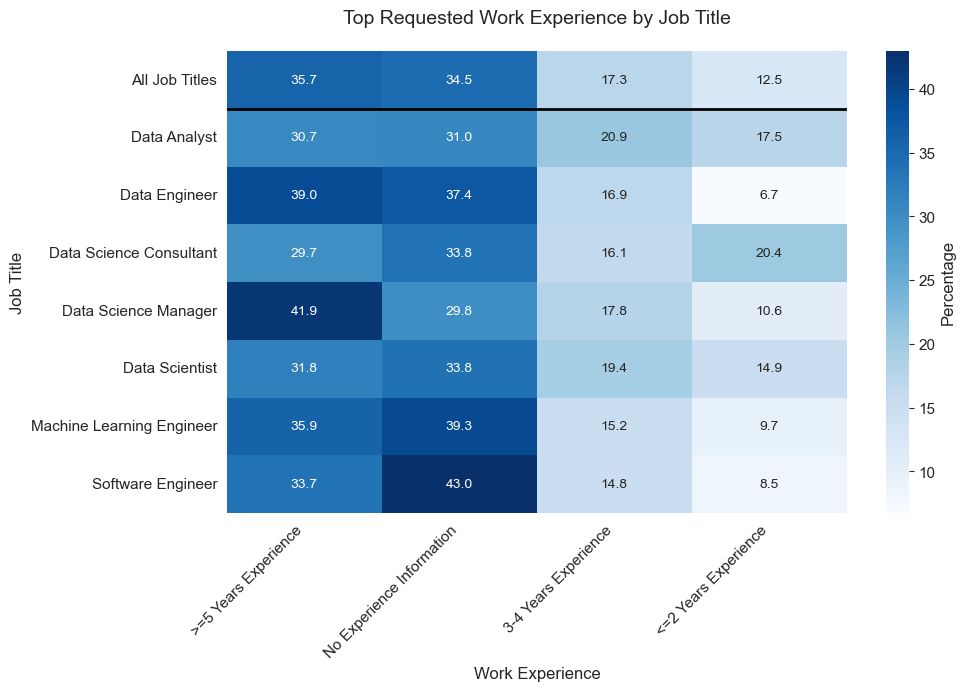

In [14]:
joint_dist = df_wide["experience"].groupby(df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["experience"].mean().apply(lambda x: round(x*100,2))
top_skills = marginal_dist.sort_values(ascending=False).head(15).index
plot_data = pd.DataFrame([marginal_dist[top_skills]], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist[top_skills]])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Top Requested Work Experience by Job Title', pad=20)
plt.xlabel('Work Experience')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

Summary:

- the distribution of work experience is very similar for all job titles
    - applicants with longer work experience are increasingly sought after
- as an entry-level employee, you have the best chances to start as a Data Analyst or Data Science Consultant
- it is interesting to note that even some managerial positions require only little work experience
    - however, it could be that experience is already taken for granted in these positions and was therefore not specified

<a id="company_size"></a>

## Does the size of a company have an impact on the positions being sought?

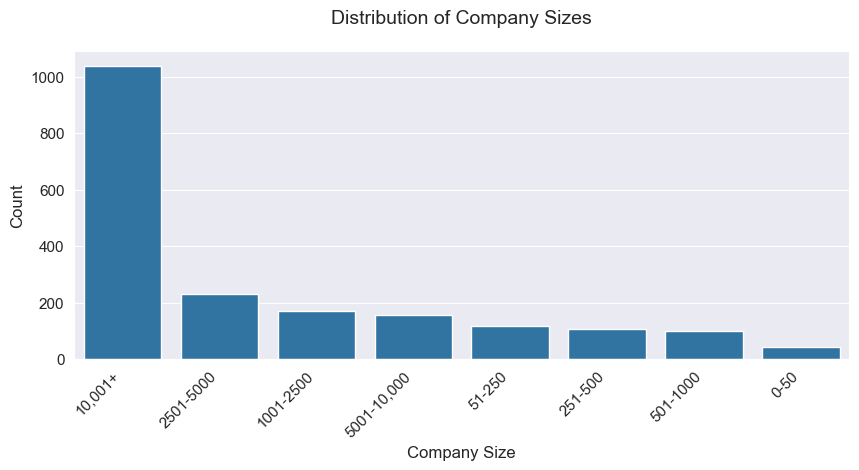

In [15]:
size_distribution = df_wide["general_info", "company_size"].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=size_distribution.index, y=size_distribution.values)
plt.title('Distribution of Company Sizes', pad=20)
plt.ylabel('Count')
plt.xlabel('Company Size')
plt.xticks(rotation=45, ha='right');

As most of the categories only have relatively few entries, these were subsequently grouped into three larger categories so that the results are not distorted by the small sample size.

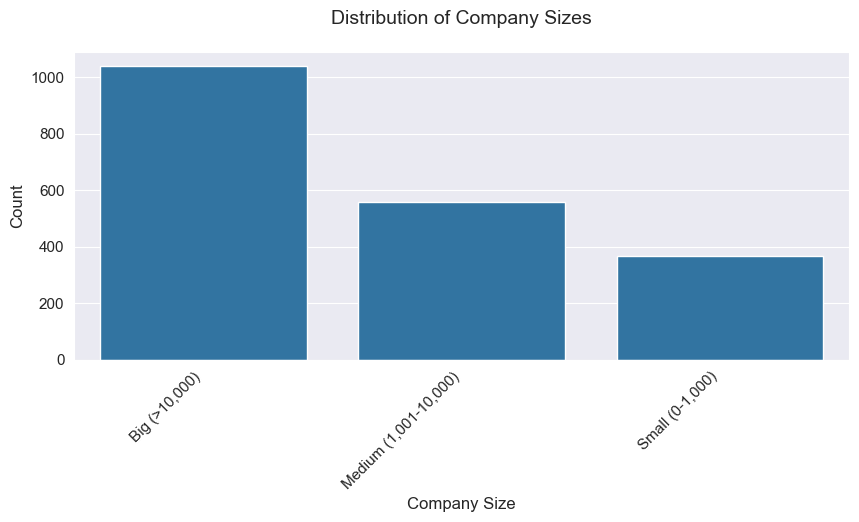

In [16]:
size_groups = df_wide["general_info", "company_size"].map({
    "10,001+": "Big (>10,000)", 
    "5001-10,000": "Medium (1,001-10,000)", 
    "2501-5000": "Medium (1,001-10,000)", 
    "1001-2500": "Medium (1,001-10,000)",
    "501-1000": "Small (0-1,000)", 
    "251-500": "Small (0-1,000)", 
    "51-250": "Small (0-1,000)", 
    "0-50": "Small (0-1,000)"
})

size_distribution = size_groups.value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=size_distribution.index, y=size_distribution.values)
plt.title('Distribution of Company Sizes', pad=20)
plt.ylabel('Count')
plt.xlabel('Company Size')
plt.xticks(rotation=45, ha='right');

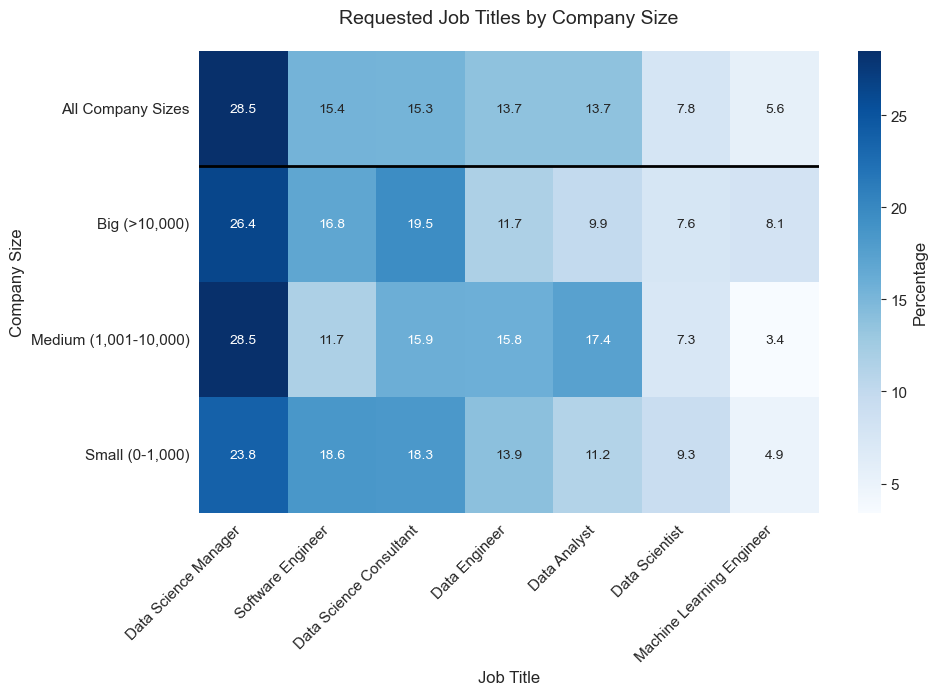

In [17]:
joint_dist = pd.crosstab(size_groups, df_wide["general_info", "title_category"], normalize='index').apply(lambda x: round(x*100, 2))
marginal_dist = df_wide["general_info", "title_category"].value_counts(normalize=True) * 100
plot_data = pd.DataFrame([marginal_dist], index=["All Company Sizes"])
plot_data = pd.concat([plot_data, joint_dist])

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Requested Job Titles by Company Size', pad=20)
plt.xlabel('Job Title')
plt.ylabel('Company Size')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

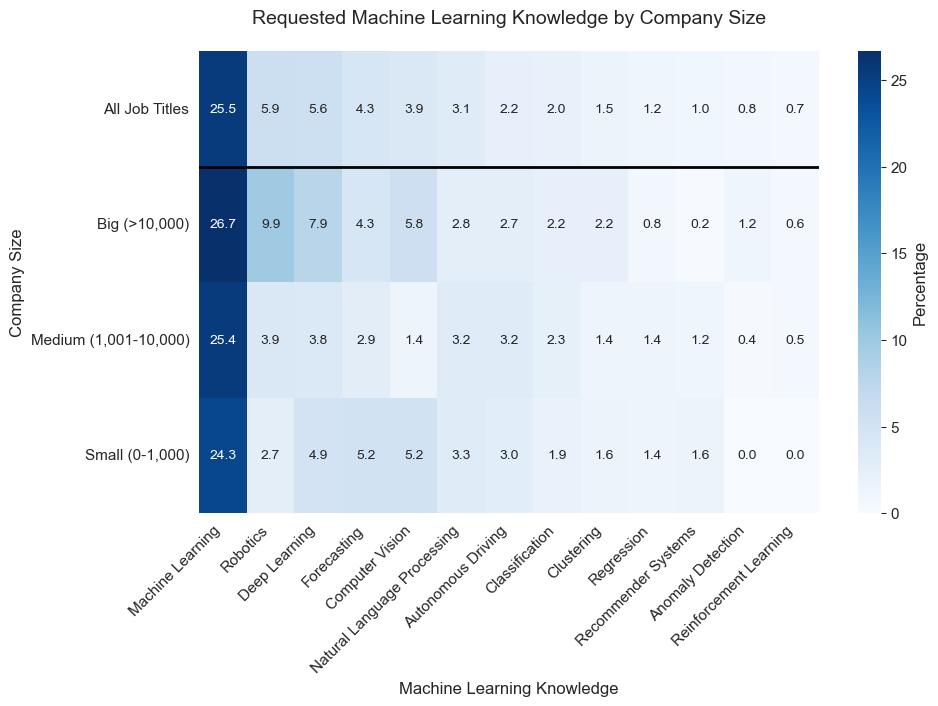

In [18]:
joint_dist = df_wide["knowledge"].groupby(size_groups).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["knowledge"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
plot_data = pd.DataFrame([marginal_dist], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Requested Machine Learning Knowledge by Company Size', pad=20)
plt.xlabel('Machine Learning Knowledge')
plt.ylabel('Company Size')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

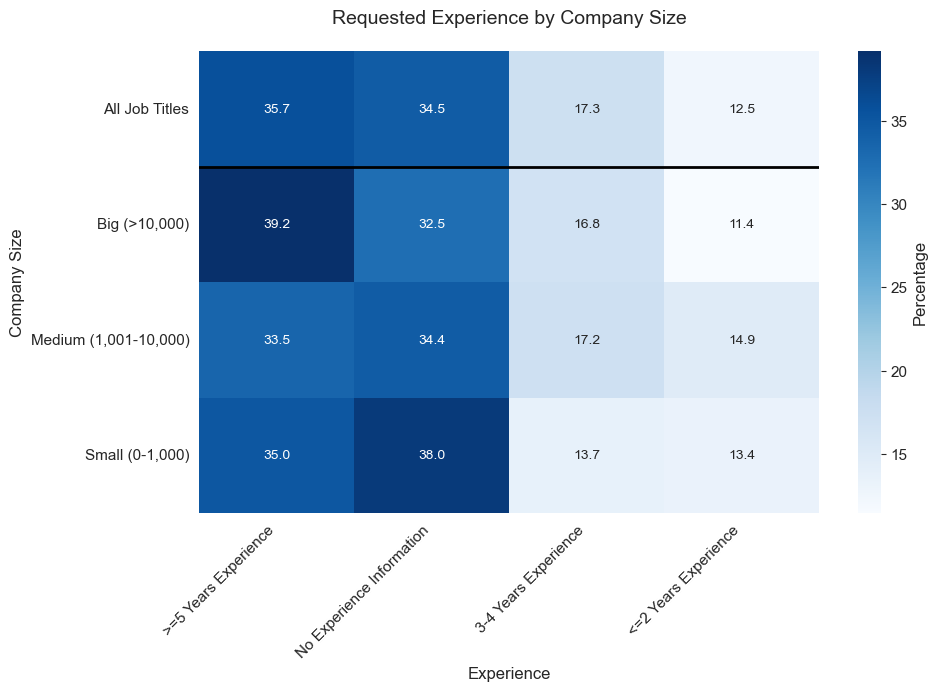

In [19]:
joint_dist = df_wide["experience"].groupby(size_groups).mean().apply(lambda x: round(x*100,2))
marginal_dist = df_wide["experience"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
plot_data = pd.DataFrame([marginal_dist], index=["All Job Titles"])
plot_data = pd.concat([plot_data, joint_dist])
plot_data.columns = plot_data.columns.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Requested Experience by Company Size', pad=20)
plt.xlabel('Experience')
plt.ylabel('Company Size')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='black', linewidth=2);

Summary:

- it seems that small and large companies have a fairly similar distribution in terms of the positions they are looking for
    - medium-sized companies, on the other hand, are looking for Data Engineers and Data Analysts somewhat more often and Machine Learning Engineers and Software Engineers less often
    - this could be due to the fact that Machine Learning Engineers and Software Engineers are needed regardless of the maturity of the company, but when the company has reached a certain size, the focus is temporarily on optimizing the data strategy and business processes
- on average, larger companies are looking for slightly more jobs with knowledge in Machine Learning
    - large companies focus comparatively often on applications in Robotics
    - it is also apparent that applications in the field of Deep Learning and Computer Vision are primarily realized by large companies and start-ups
- it turns out that larger companies are more often looking for candidates with more professional experience

<a id="home_office"></a>

## Which attributes increase the home office probability?

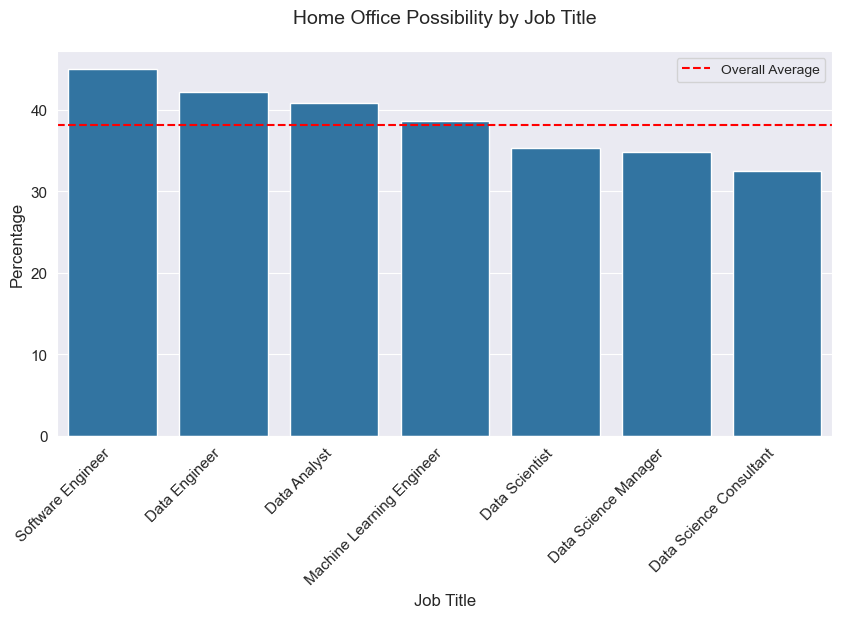

In [20]:
home_office_distribution = (df_wide["general_info", "home_office_possible"]
                            .groupby(df_wide["general_info", "title_category"]).mean()
                            .apply(lambda x: round(x*100,2))
                            .sort_values(ascending=False))
overall_average = df_wide["general_info", "home_office_possible"].mean()*100

plt.figure(figsize=(10, 5))
sns.barplot(x=home_office_distribution.index, y=home_office_distribution.values)
plt.axhline(y=overall_average, color='red', linestyle='--', label='Overall Average')
plt.title('Home Office Possibility by Job Title', pad=20)
plt.xlabel('Job Title')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend();

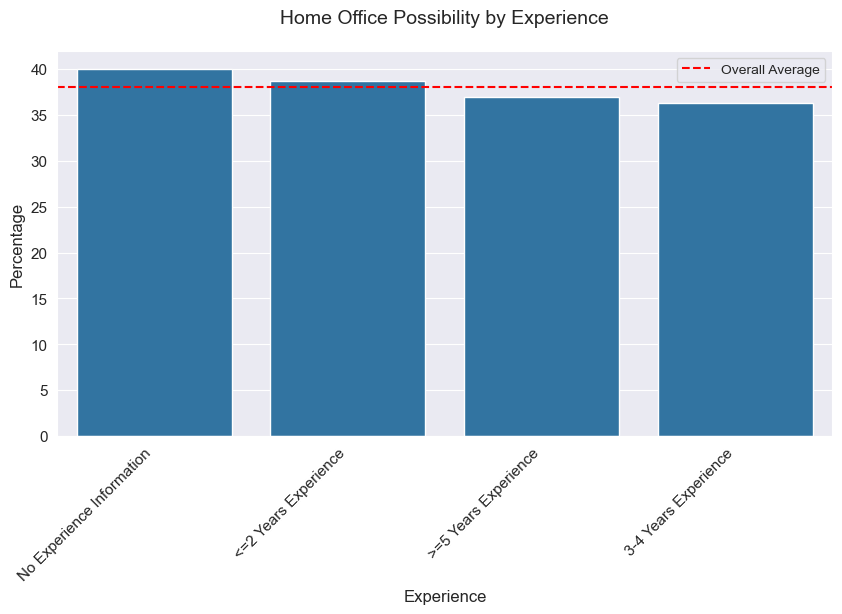

In [21]:
experience = df_wide["experience"].idxmax(axis=1)
home_office_distribution = (df_wide["general_info", "home_office_possible"]
                            .groupby(experience).mean()
                            .apply(lambda x: round(x*100,2))
                            .sort_values(ascending=False))
overall_average = df_wide["general_info", "home_office_possible"].mean()*100
home_office_distribution.index = home_office_distribution.index.str.replace("_", " ").str.title()

plt.figure(figsize=(10, 5))
sns.barplot(x=home_office_distribution.index, y=home_office_distribution.values)
plt.axhline(y=overall_average, color='red', linestyle='--', label='Overall Average')
plt.title('Home Office Possibility by Experience', pad=20)
plt.xlabel('Experience')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend();

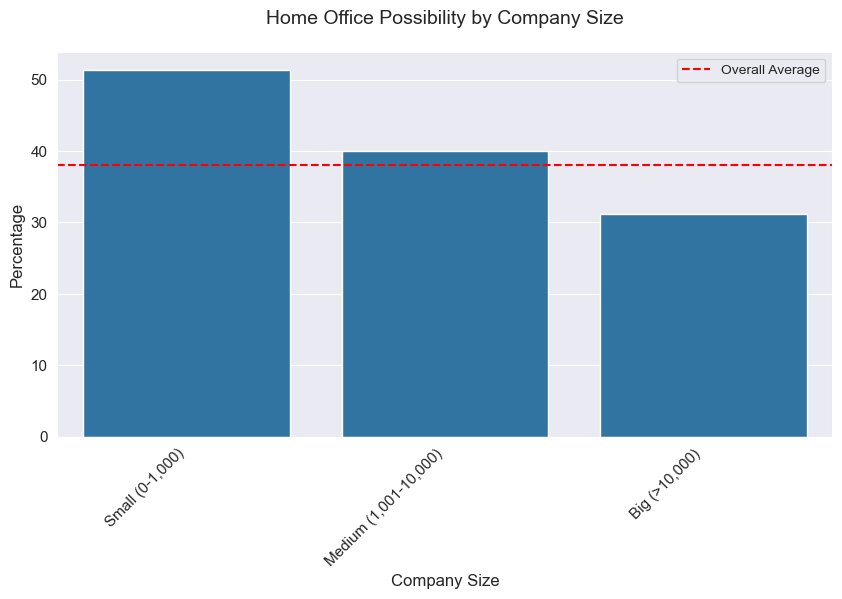

In [22]:
home_office_distribution = (df_wide["general_info", "home_office_possible"]
                            .groupby(size_groups).mean()
                            .apply(lambda x: round(x*100,2))
                            .sort_values(ascending=False))
overall_average = df_wide["general_info", "home_office_possible"].mean()*100

plt.figure(figsize=(10, 5))
sns.barplot(x=home_office_distribution.index, y=home_office_distribution.values)
plt.axhline(y=overall_average, color='red', linestyle='--', label='Overall Average')
plt.title('Home Office Possibility by Company Size', pad=20)
plt.xlabel('Company Size')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend();

Summary:

- there are noticeable differences between the different job titles regarding home office possibilities
    - Manager and Consultant positions offer the least home office opportunities, as they require more communication and direct contact with colleagues and customers than, for example, a Software Engineer or Data Engineer
- the experience level of the person has hardly any influence on the possibility for home office and there is no clear pattern visible
- the smaller the company, the higher the chance to do the job in the home office
    - this could be used to compensate for the generally lower average salaries in smaller companies

<a id="regions"></a>

## In which regions of Germany are most Data Science jobs offered?

In [23]:
df_long = pd.read_csv("../data/data_long.csv")
df_long = df_long.loc[df_long["title_category"] != "Others"]
df_long.head()

,link,company,title,content,industry,rating,num_ratings,company_link,release_date,company_size,...,full_time,part_time,home_office_possible,title_category,experience_level,average_salary,location,latitude,longitude,region
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,...,True,False,True,Machine Learning Engineer,No Information,NaN,Walldorf,49.307822,8.641450,Baden-Württemberg
1,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,...,True,False,True,Machine Learning Engineer,No Information,NaN,Stuttgart,48.706310,9.119240,Baden-Württemberg
2,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,...,True,False,True,Machine Learning Engineer,No Information,NaN,München,48.152126,11.544467,Bavaria
3,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,...,True,False,True,Machine Learning Engineer,No Information,NaN,Leipzig,51.341053,12.404024,Saxony
4,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,...,True,False,True,Machine Learning Engineer,No Information,NaN,Hamburg,53.576158,10.007046,Hamburg


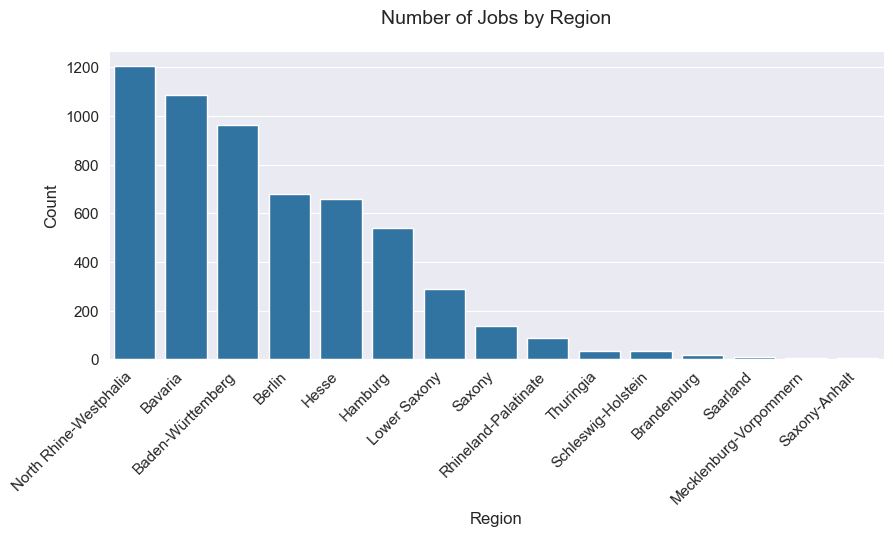

In [24]:
job_counts = df_long["region"].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title('Number of Jobs by Region', pad=20)
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right');

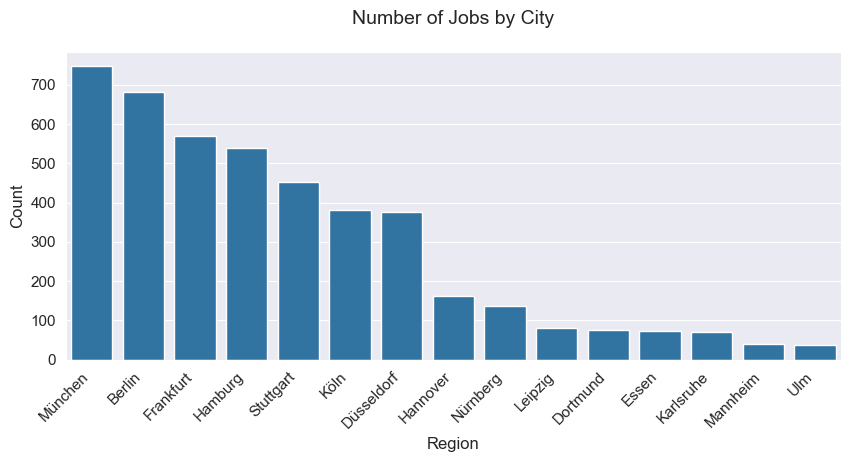

In [25]:
job_counts = df_long["location"].value_counts().head(15)

plt.figure(figsize=(10, 4))
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title('Number of Jobs by City', pad=20)
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right');

In [26]:
df_map = df_long.groupby(["location", "latitude", "longitude"], as_index=False)["link"].agg({"number of jobs": "count"})

df_map["size"] = np.log(df_map["number of jobs"] + 1)

fig = px.scatter_mapbox(df_map,
                        lat="latitude", lon="longitude",
                        hover_name="location",
                        hover_data={"latitude": False, "longitude": False, "size": False, "number of jobs": True},
                        color_discrete_sequence=['blue'],
                        mapbox_style="open-street-map",
                        size="size",
                        size_max=20,
                        zoom=5,
                        opacity=0.5,
                        center={"lat": 51, "lon": 10},
                        width=650, height=800,
                        title="Geographical Distribution of Jobs")

# Scatter mapbox does not render in Github
fig.update_layout(title={"x": 0.5})
fig.show()

Summary:

- the vast majority of jobs are offered in large cities (e.g. Munich, Berlin, Frankfurt, Hamburg)
- more rural regions, especially in the east of Germany, are much less likely to be looking for suitable candidates
    - however, this does not necessarily mean that there are no data science jobs available in these regions, but only that they are not looking for them via Steptone

<a id="company"></a>

## Which companies search the most for new data roles?

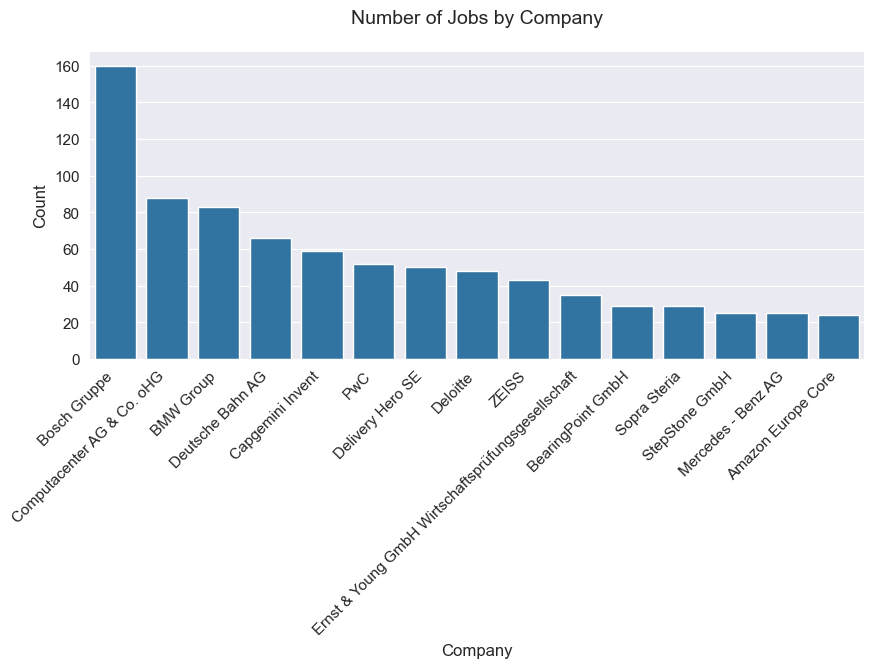

In [27]:
job_counts = df_wide["general_info", "company"].value_counts().head(15)

plt.figure(figsize=(10, 4))
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title('Number of Jobs by Company', pad=20)
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right');

<a id="salary"></a>

## Which attributes influence the salary of a job?

The salary data used are not real salaries but already forecasts of a machine learning model developed by Stepstone. According to Stepstone, the forecasts of this model are based on three factors:
- job characteristics
- employer profile
- qualifications

### Influence of the job characteristics

Job characteristics include:
- job title
- experience level
- work type / contract type

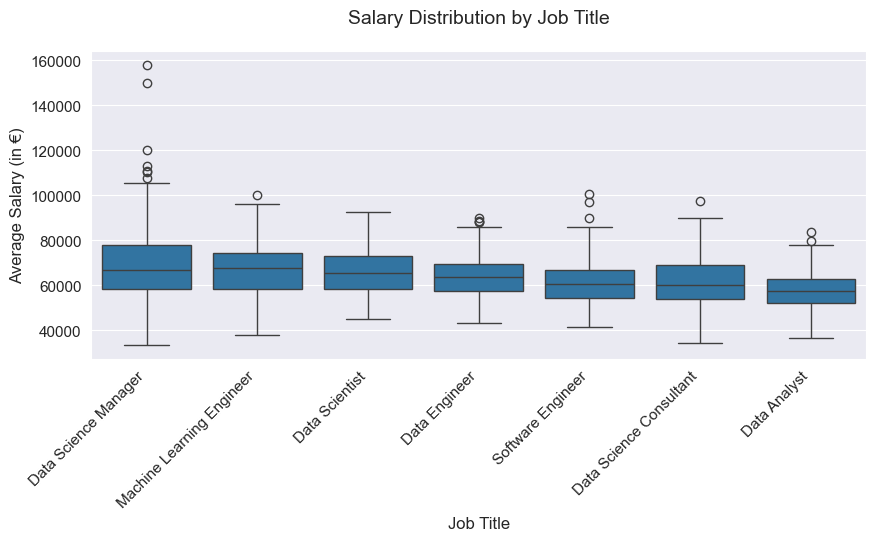

In [28]:
means = df_wide.groupby([("general_info", "title_category")])[[("general_info", "average_salary")]].mean()
job_order = means.sort_values(("general_info", "average_salary"), ascending=False).index

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_wide, x=("general_info", "title_category"), y=("general_info", "average_salary"), order=job_order)
plt.title('Salary Distribution by Job Title', pad=20)
plt.xlabel('Job Title')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

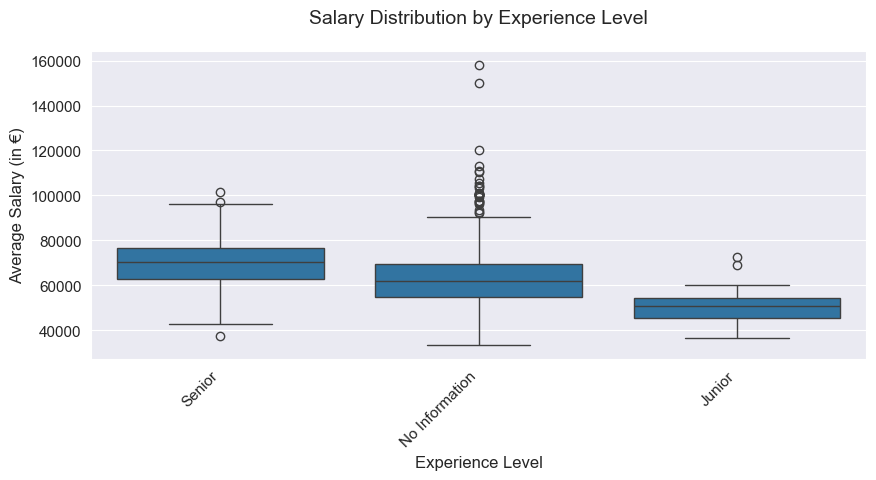

In [29]:
means = df_wide.groupby([("general_info", "experience_level")])[[("general_info", "average_salary")]].mean()
job_order = means.sort_values(("general_info", "average_salary"), ascending=False).index

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_wide, x=("general_info", "experience_level"), y=("general_info", "average_salary"), order=job_order)
plt.title('Salary Distribution by Experience Level', pad=20)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

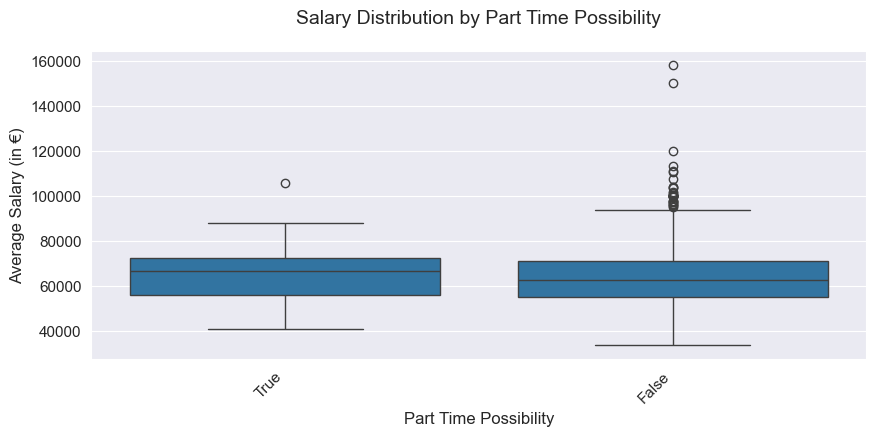

In [30]:
means = df_wide.groupby([("general_info", "part_time")])[[("general_info", "average_salary")]].mean()
job_order = means.sort_values(("general_info", "average_salary"), ascending=False).index

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_wide, x=("general_info", "part_time"), y=("general_info", "average_salary"), order=job_order)
plt.title('Salary Distribution by Part Time Possibility', pad=20)
plt.xlabel('Part Time Possibility')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

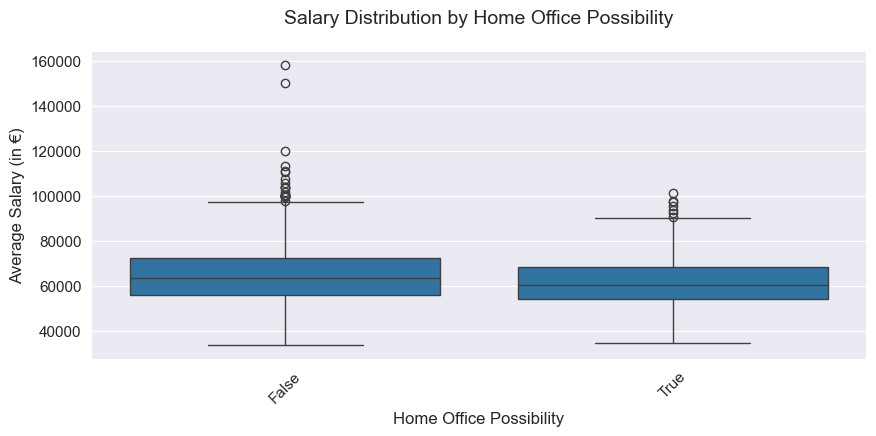

In [31]:
means = df_wide.groupby([("general_info", "home_office_possible")])[[("general_info", "average_salary")]].mean()
job_order = means.sort_values(("general_info", "average_salary"), ascending=False).index

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_wide, x=("general_info", "home_office_possible"), y=("general_info", "average_salary"), order=job_order)
plt.title('Salary Distribution by Home Office Possibility', pad=20)
plt.xlabel('Home Office Possibility')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='center');

Summary:

- the job title has a great influence on the salary
- the higher the experience level, the higher the salary
- for the feature "part_time" does not seem to make a big difference
- jobs without the possibility of a home office are on average paid better

### Influence of the employee profile

Employer profile includes:
- location information
- industry sector
- company size

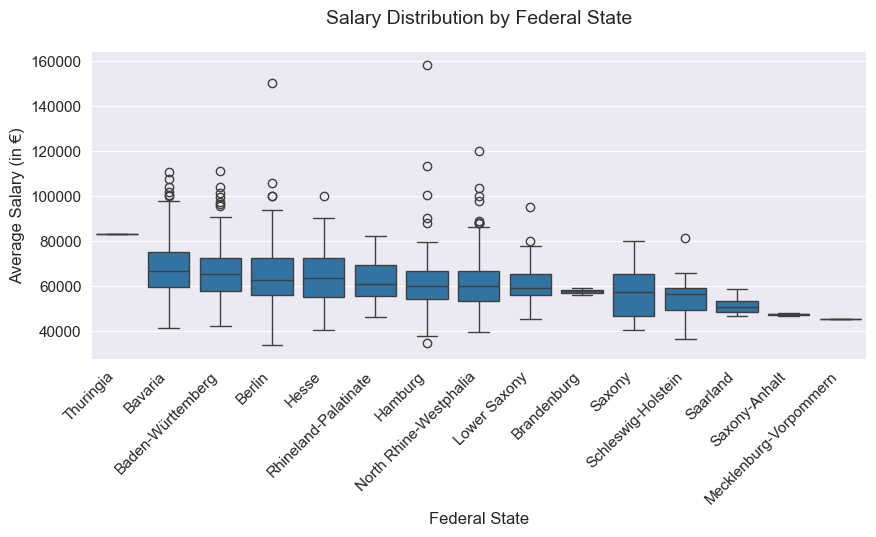

In [32]:
means = df_wide.groupby([("general_info", "main_region")])[[("general_info", "average_salary")]].mean()
job_order = means.sort_values(("general_info", "average_salary"), ascending=False).index

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_wide, x=("general_info", "main_region"), y=("general_info", "average_salary"), order=job_order)
plt.title('Salary Distribution by Federal State', pad=20)
plt.xlabel('Federal State')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

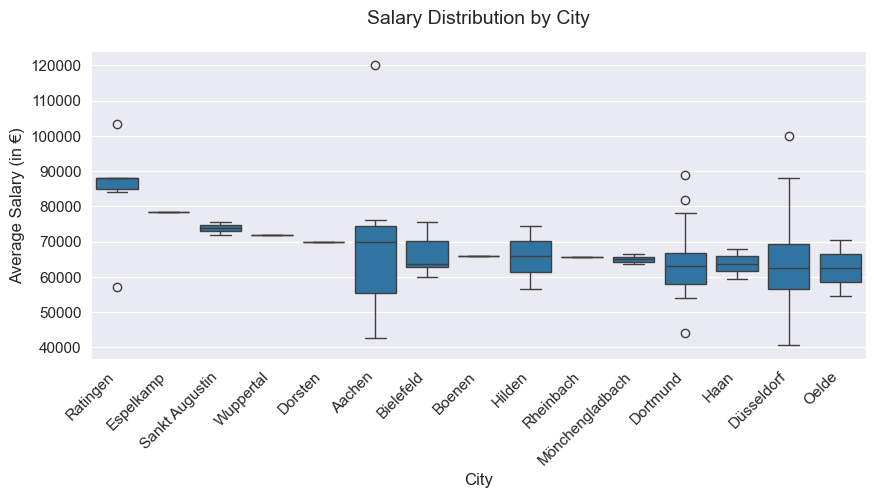

In [33]:
locations = df_wide.loc[df_wide["general_info", "main_region"] == "North Rhine-Westphalia"]
means = locations.groupby([("general_info", "main_location")])[[("general_info", "average_salary")]].mean()
job_order = means.sort_values(("general_info", "average_salary"), ascending=False).head(15).index

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_wide, x=("general_info", "main_location"), y=("general_info", "average_salary"), order=job_order)
plt.title('Salary Distribution by City', pad=20)
plt.xlabel('City')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

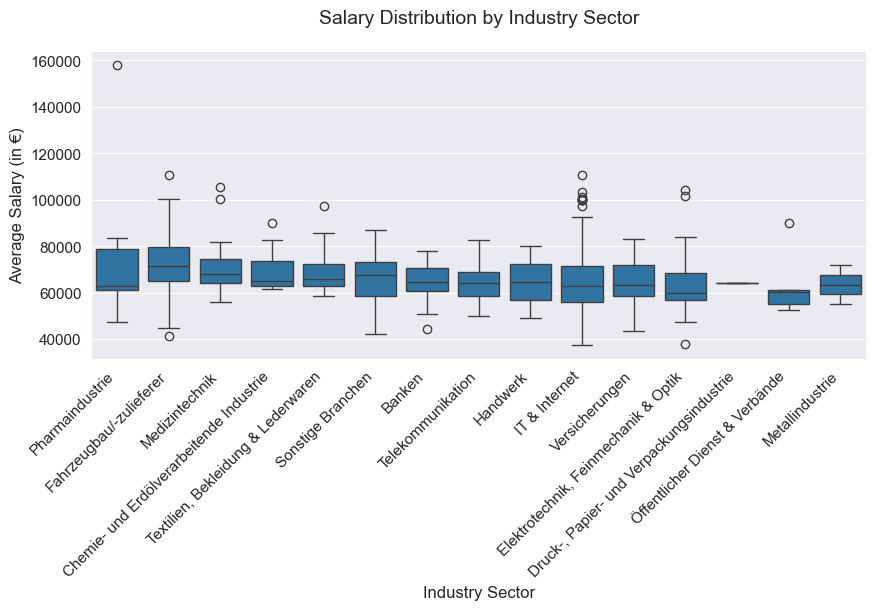

In [34]:
means = df_wide.groupby([("general_info", "main_industry")])[[("general_info", "average_salary")]].mean()
job_order = means.sort_values(("general_info", "average_salary"), ascending=False).head(15).index

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_wide, x=("general_info", "main_industry"), y=("general_info", "average_salary"), order=job_order)
plt.title('Salary Distribution by Industry Sector', pad=20)
plt.xlabel('Industry Sector')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

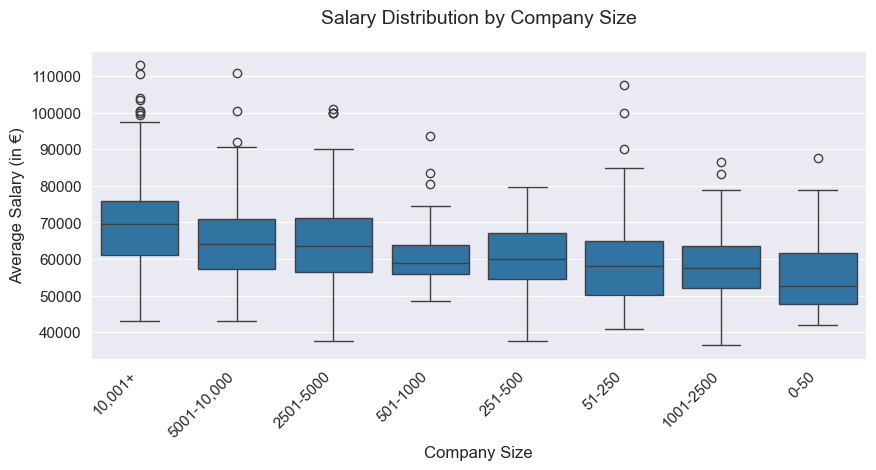

In [35]:
means = df_wide.groupby([("general_info", "company_size")])[[("general_info", "average_salary")]].mean()
job_order = means.sort_values(("general_info", "average_salary"), ascending=False).head(15).index

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_wide, x=("general_info", "company_size"), y=("general_info", "average_salary"), order=job_order)
plt.title('Salary Distribution by Company Size', pad=20)
plt.xlabel('Company Size')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

Summary:

- both the states and the cities themselves have a large impact on the salary
    - in both cases, however, many rare categories exist ==> enough regularization is needed when modeling to not overfit these categories
- the industry sector of a company also has a strong influence on the salary
- larger companies pay on average larger salaries

### Influence of the required qualifications

Required qualifications include:
- amount of work experience
- type of degree
- field of study

Since Stepstone's model also has to make predictions for completely different career fields than Data Science, it is very unlikely that these models include Data-Science-specific tools in its predictions. Therefore, extracted skills such as Python or SQL are not considered in this analysis.

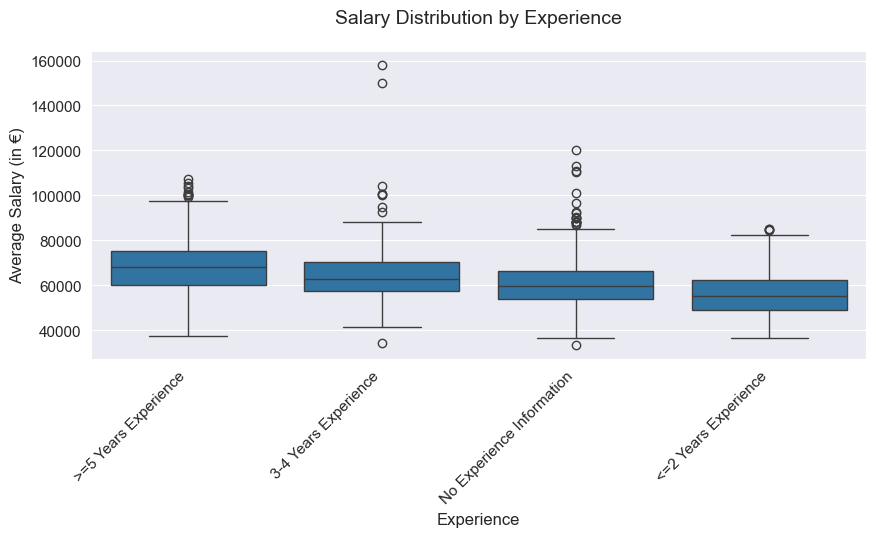

In [36]:
exp_salaries = df_wide["experience"].apply(lambda x: np.where(x, df_wide["general_info", "average_salary"], np.nan))
exp_salaries.columns = exp_salaries.columns.str.replace("_", " ").str.title()
means = exp_salaries.mean()
exp_order = means.sort_values(ascending=False).index

plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=exp_salaries, color="#1f77b4", order=exp_order)
plt.title('Salary Distribution by Experience', pad=20)
plt.xlabel('Experience')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

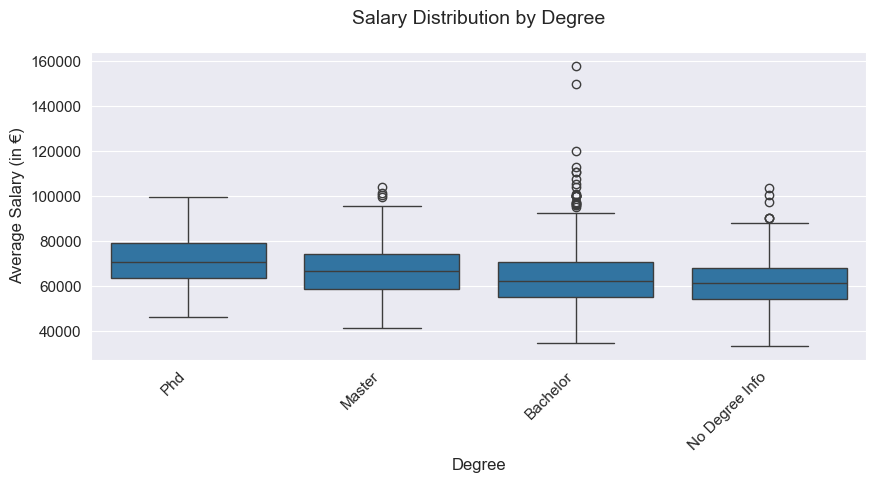

In [37]:
exp_salaries = df_wide["degree"].apply(lambda x: np.where(x, df_wide["general_info", "average_salary"], np.nan))
exp_salaries.columns = exp_salaries.columns.str.replace("_", " ").str.title()
means = exp_salaries.mean()
exp_order = means.sort_values(ascending=False).index

plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=exp_salaries, color="#1f77b4", order=exp_order)
plt.title('Salary Distribution by Degree', pad=20)
plt.xlabel('Degree')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

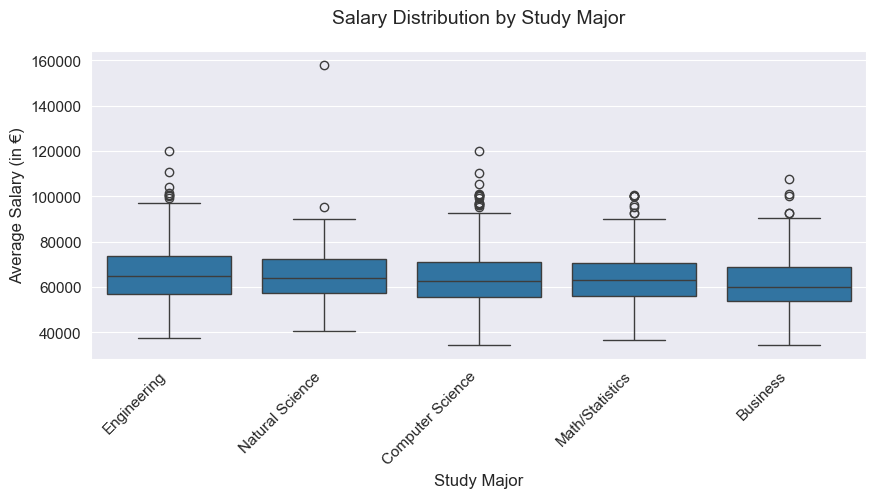

In [38]:
exp_salaries = df_wide["major"].apply(lambda x: np.where(x, df_wide["general_info", "average_salary"], np.nan))
exp_salaries.columns = exp_salaries.columns.str.replace("_", " ").str.title()
means = exp_salaries.mean()
exp_order = means.sort_values(ascending=False).index

plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=exp_salaries, color="#1f77b4", order=exp_order)
plt.title('Salary Distribution by Study Major', pad=20)
plt.xlabel('Study Major')
plt.ylabel('Average Salary (in €)')
plt.xticks(rotation=45, ha='right');

Summary:

- the greater the work experience, the higher the salary
- the higher the degree, the higher the salary
- it does not look like the distributions differ significantly for different study majors